In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

In [3]:
df = pd.read_csv('/content/drive/MyDrive/sentiment/senti.csv',encoding = 'latin',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df = df.drop(['id', 'date', 'query', 'user_id'], axis=1)

In [6]:
lab_to_sentiment = {0:"Negative", 4:"Positive"}
def label_decoder(label):
  return lab_to_sentiment[label]
df.sentiment = df.sentiment.apply(lambda x: label_decoder(x))
df.head()

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."


Text(0.5, 1.0, 'Sentiment Data Distribution')

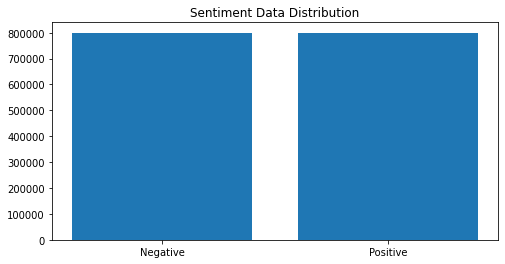

In [7]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Sentiment Data Distribution")

In [9]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

def cleanTxt(text):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()

  return text

df['text'] = df['text'].apply(cleanTxt)   #clean texts
df

,sentiment,text
0,Negative,awww that s a bummer you shoulda got david car...
1,Negative,is upset that he can t update his facebook by ...
2,Negative,i dived many times for the ball managed to sav...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,no it s not behaving at all i m mad why am i h...
...,...,...
1599995,Positive,just woke up having no school is the best feel...
1599996,Positive,thewdb com very cool to hear old walt interviews
1599997,Positive,are you ready for your mojo makeover ask me fo...
1599998,Positive,happy 38th birthday to my boo of alll time tup...


In [10]:
TRAIN_SIZE = 0.8
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [11]:
def preprocess(text, stem=False):
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [12]:
train_data.text = train_data.text.apply(lambda x: preprocess(x))
test_data.text = test_data.text.apply(lambda x: preprocess(x))

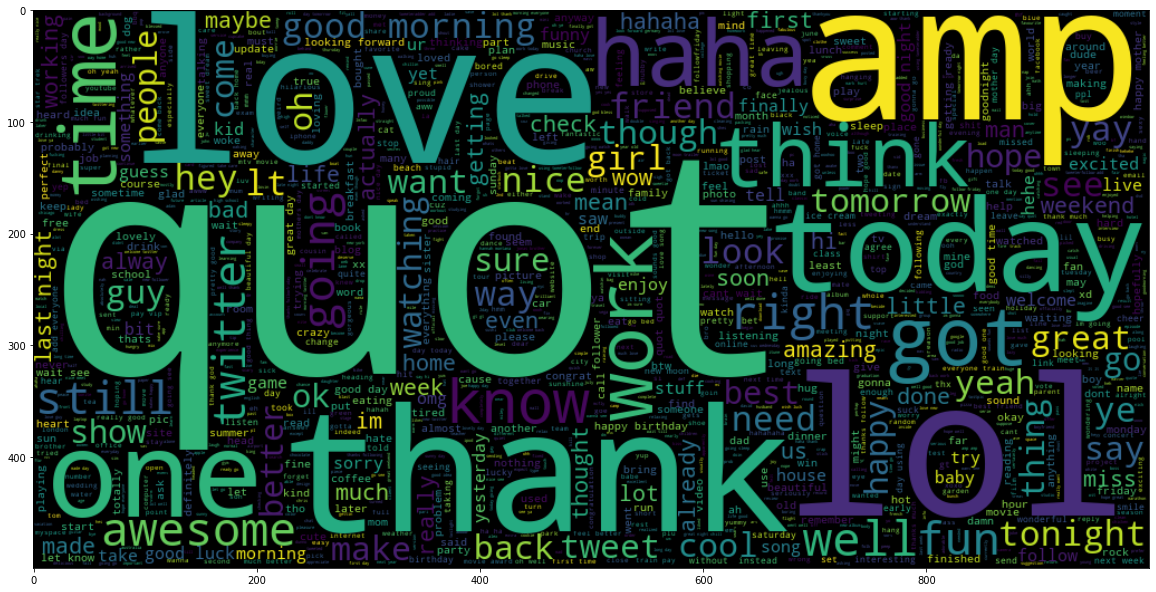

In [13]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1000 , height = 500).generate(" ".join(train_data[train_data.sentiment == 'Positive'].text))
plt.imshow(wc , interpolation = 'bilinear')

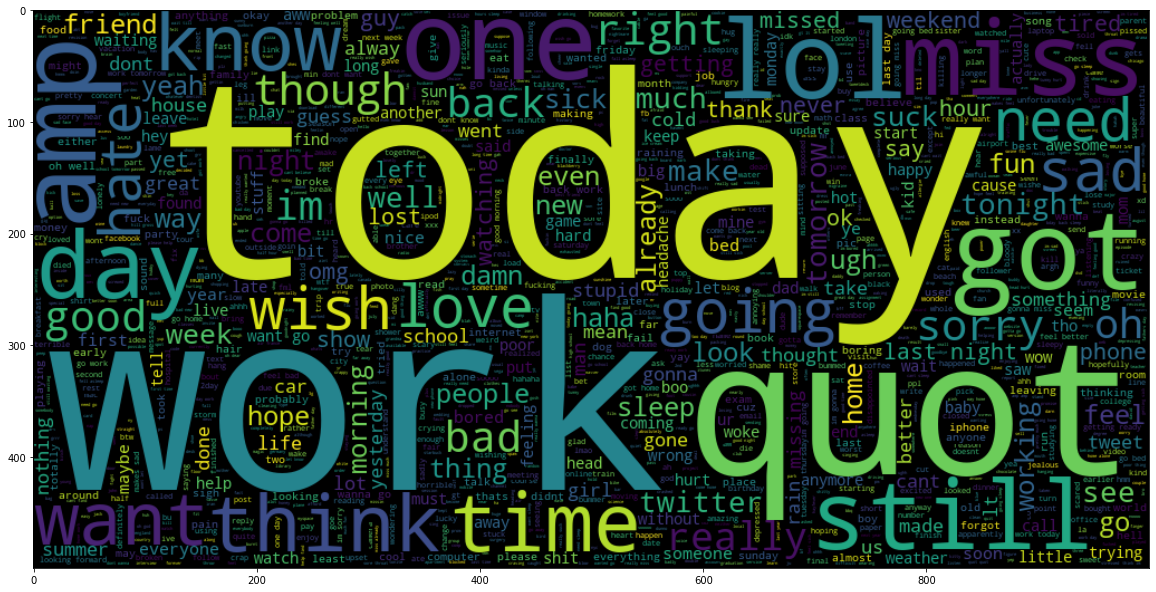

In [14]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1000 , height = 500).generate(" ".join(test_data[test_data.sentiment == 'Negative'].text))
plt.imshow(wc , interpolation = 'bilinear')

In [15]:

MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [ ]:
#train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,random_state=7) # Splits Dataset into Training and Testing set
#print("Train Data size:", len(train_data))
#print("Test Data size", len(test_data))

Train Data size: 1280000
Test Data size 320000


In [21]:
td=test_data

td


,sentiment,text
709290,Negative,feelin lately reason
654075,Negative,ju clare elly zoe leave marbella
728623,Negative,wish couldve seen miley nick sing 2night
697650,Negative,work today 1 hour 6 go
1244425,Positive,started catch house viewing kind odd watched b...
...,...,...
1242702,Positive,haha aware outdated amp option update info
206655,Negative,craves sort socialising drinks glasgow anyone
1065583,Positive,happened around time changed photo excuse
846910,Positive,hope u got nice long soak shower xx


In [17]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.text)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 290575


In [22]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.text),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.text),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (1280000, 30)
Testing X Shape: (320000, 30)


In [23]:
labels = train_data.sentiment.unique().tolist()

In [24]:
encoder = LabelEncoder()
encoder.fit(train_data.sentiment.to_list())

y_train = encoder.transform(train_data.sentiment.to_list())
y_test = encoder.transform(test_data.sentiment.to_list())

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (1280000, 1)
y_test shape: (320000, 1)


In [26]:
GLOVE_EMB = '/content/drive/MyDrive/sentiment/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10


In [27]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [28]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [29]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [30]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [31]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [32]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [33]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on GPU...


In [34]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1250/1250 [==============================] - 201s 149ms/step - loss: 0.5204 - accuracy: 0.7380 - val_loss: 0.4834 - val_accuracy: 0.7659 - lr: 0.0010
Epoch 2/10
1250/1250 [==============================] - 177s 141ms/step - loss: 0.4876 - accuracy: 0.7626 - val_loss: 0.4735 - val_accuracy: 0.7718 - lr: 0.0010
Epoch 3/10
1250/1250 [==============================] - 150s 120ms/step - loss: 0.4774 - accuracy: 0.7692 - val_loss: 0.4670 - val_accuracy: 0.7752 - lr: 0.0010
Epoch 4/10
1250/1250 [==============================] - 158s 126ms/step - loss: 0.4706 - accuracy: 0.7733 - val_loss: 0.4649 - val_accuracy: 0.7775 - lr: 0.0010
Epoch 5/10
1250/1250 [==============================] - 151s 121ms/step - loss: 0.4665 - accuracy: 0.7758 - val_loss: 0.4616 - val_accuracy: 0.7792 - lr: 0.0010
Epoch 6/10
1250/1250 [==============================] - 148s 118ms/step - loss: 0.4628 - accuracy: 0.7784 - val_loss: 0.4596 - val_accuracy: 0.7801 - lr: 0.0010
Epoch 7/10
1250/1250 [============

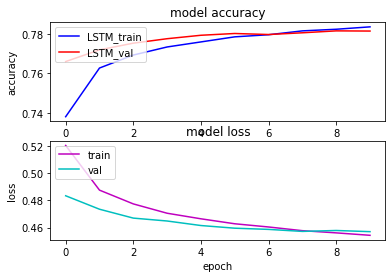

In [35]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [ ]:
def decode_sentiment(score):
    return "Positive" if score>0.5 else "Negative"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]


In [54]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,normalize=True):
    

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

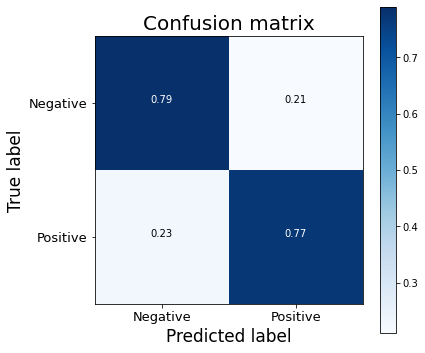

In [38]:
cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

# Lexicon Approach(TextBlob)

In [ ]:
from textblob import TextBlob

def getPol(text):
  return "Positive" if float(TextBlob(text).sentiment.polarity)>0.5 else "Negative"


lex_res=test_data['text'].apply(getPol).tolist()


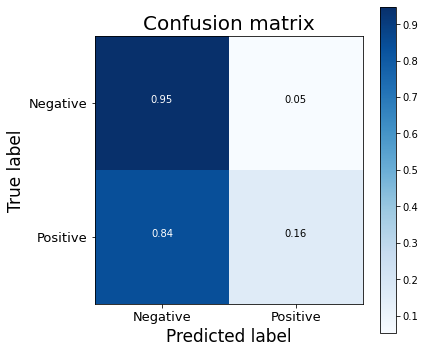

In [43]:
lex_cnf_matrix = confusion_matrix(test_data.sentiment.to_list(), lex_res)
plt.figure(figsize=(6,6))
plot_confusion_matrix(lex_cnf_matrix, classes=test_data.sentiment.unique(), title="Confusion matrix")
plt.show()

### Classification Scores

In [44]:
print(classification_report(list(test_data.sentiment), y_pred_1d))

              precision    recall  f1-score   support

    Negative       0.78      0.79      0.78    160542
    Positive       0.78      0.77      0.78    159458

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [45]:
print(classification_report(list(test_data.sentiment), lex_res))

              precision    recall  f1-score   support

    Negative       0.53      0.95      0.68    160542
    Positive       0.75      0.16      0.26    159458

    accuracy                           0.55    320000
   macro avg       0.64      0.55      0.47    320000
weighted avg       0.64      0.55      0.47    320000



In [52]:
td['ml_res']=y_pred_1d
td['lex_res']=lex_res

td


,sentiment,text,ml_res,lex_res
709290,Negative,feelin lately reason,Negative,Negative
654075,Negative,ju clare elly zoe leave marbella,Negative,Negative
728623,Negative,wish couldve seen miley nick sing 2night,Negative,Negative
697650,Negative,work today 1 hour 6 go,Negative,Negative
1244425,Positive,started catch house viewing kind odd watched b...,Positive,Negative
...,...,...,...,...
1242702,Positive,haha aware outdated amp option update info,Positive,Negative
206655,Negative,craves sort socialising drinks glasgow anyone,Positive,Negative
1065583,Positive,happened around time changed photo excuse,Negative,Negative
846910,Positive,hope u got nice long soak shower xx,Positive,Negative


Text(0.5, 1.0, 'Accuracy Compaison')

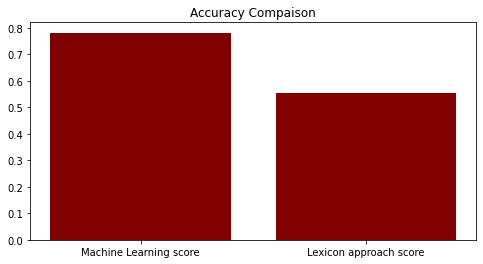

In [59]:
ml_score = accuracy_score(list(test_data.sentiment), y_pred_1d )
lex_score = accuracy_score(list(test_data.sentiment), lex_res )

plt.figure(figsize=(8,4))
plt.bar(['Machine Learning score','Lexicon approach score'], [ml_score,lex_score],color ='maroon')
plt.title("Accuracy Compaison")